# **Google Price**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import yfinance as yf
import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings('ignore')

In [34]:
google = yf.Ticker('GOOG')
df = google.history('5Y')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,0.0,0.0
2018-11-27 00:00:00-05:00,52.049999,52.879002,51.924500,52.220501,36064000,0.0,0.0
2018-11-28 00:00:00-05:00,52.438000,54.341999,51.787998,54.311501,49508000,0.0,0.0
2018-11-29 00:00:00-05:00,53.804001,54.712250,53.799999,54.415001,29378000,0.0,0.0
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,0.0,0.0


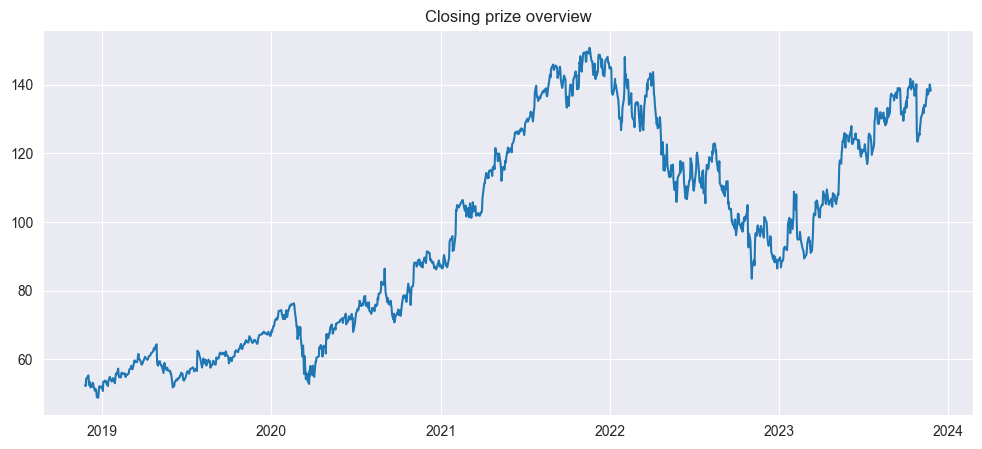

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.title('Closing prize overview')
plt.plot(df['Close'])
plt.show() 

In [36]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()

df['200DMA'] = df['Close'].rolling(200).mean()

In [37]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,200DMA
Date,,,,,,,,,
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,0.0,0.0,NaN,NaN
2018-11-27 00:00:00-05:00,52.049999,52.879002,51.924500,52.220501,36064000,0.0,0.0,NaN,NaN
2018-11-28 00:00:00-05:00,52.438000,54.341999,51.787998,54.311501,49508000,0.0,0.0,NaN,NaN
2018-11-29 00:00:00-05:00,53.804001,54.712250,53.799999,54.415001,29378000,0.0,0.0,NaN,NaN
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,0.0,0.0,NaN,NaN


In [38]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,200DMA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000,1209.000000,1059.000000
mean,97.000824,98.135471,95.987602,97.084532,2.948099e+07,0.0,0.015898,97.225268,98.014452
std,30.322960,30.606404,30.012413,30.297514,1.298150e+07,0.0,0.563884,29.369602,26.498808
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,53.194010,56.791503
25%,67.500000,68.034212,67.038126,67.469749,2.115550e+07,0.0,0.000000,68.156175,70.399840
50%,97.939999,99.571003,96.750000,98.070000,2.638530e+07,0.0,0.000000,97.165200,102.222113
75%,124.677876,125.950003,123.297503,124.417500,3.347150e+07,0.0,0.000000,123.651800,119.614493
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [39]:
df.columns
df.drop(columns=['Dividends','Stock Splits'],inplace=True)
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,NaN,NaN
2018-11-27 00:00:00-05:00,52.049999,52.879002,51.924500,52.220501,36064000,NaN,NaN
2018-11-28 00:00:00-05:00,52.438000,54.341999,51.787998,54.311501,49508000,NaN,NaN
2018-11-29 00:00:00-05:00,53.804001,54.712250,53.799999,54.415001,29378000,NaN,NaN
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,NaN,NaN


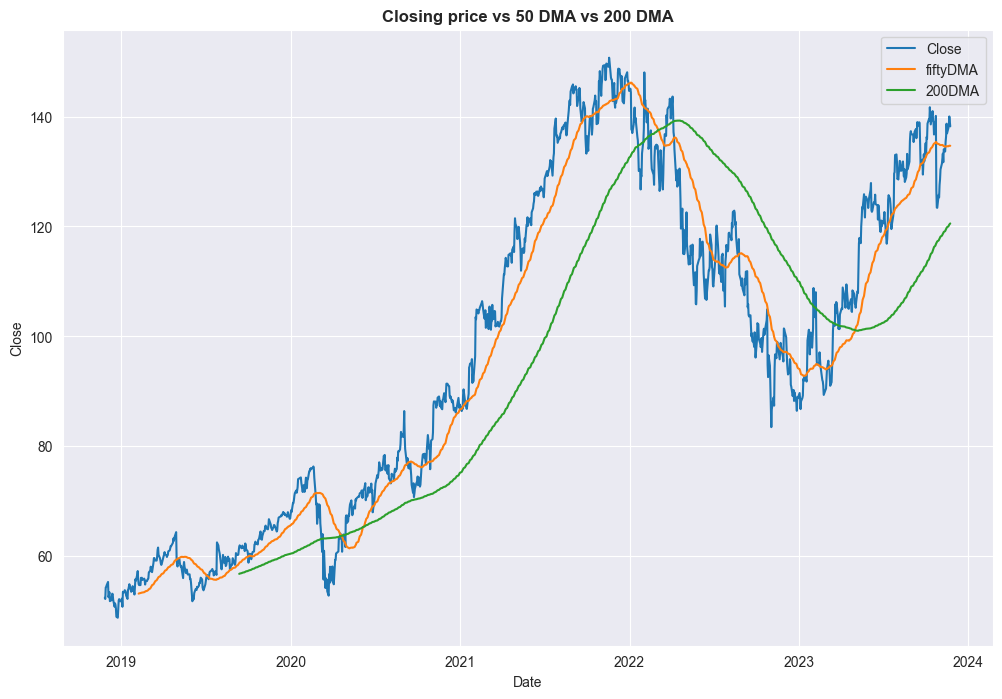

In [40]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x=df.index,y='Close',label='Close')
sns.lineplot(data=df,x=df.index,y='fiftyDMA',label='fiftyDMA')
sns.lineplot(data=df,x=df.index,y='200DMA',label='200DMA')
plt.title('Closing price vs 50 DMA vs 200 DMA',fontsize=12,weight='bold')
plt.show()

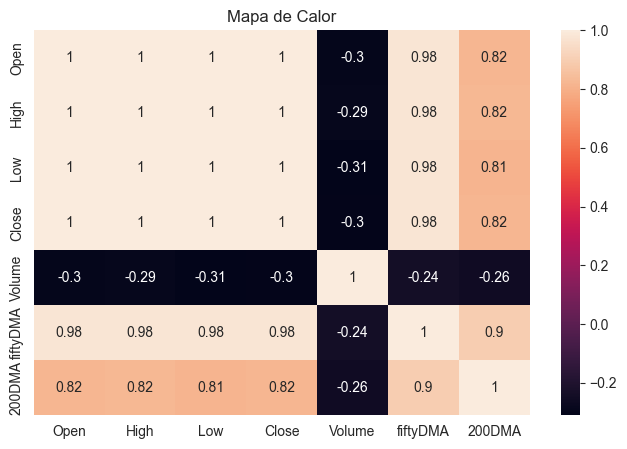

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [42]:
for i in range(3):
    i+=1
    print(i)

1
2
3


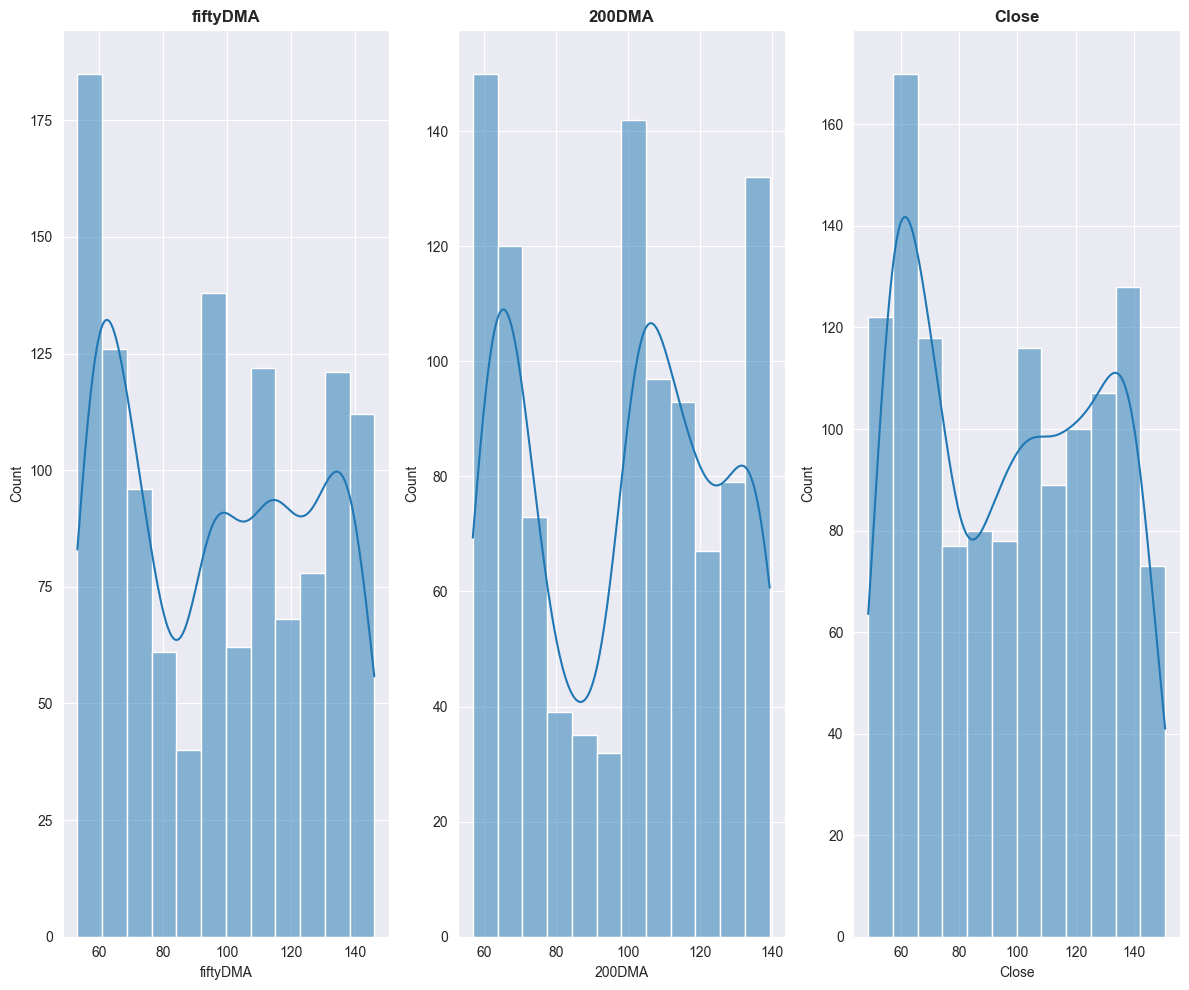

In [43]:
col=['fiftyDMA', '200DMA','Close']
df[col].head()
fig,axes=plt.subplots(1,3,figsize=(12,10))
for i, col_name in enumerate(col):
    sns.histplot(data=df,x=col_name,kde=True,ax=axes[i])
    axes[i].set_title(col_name,fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

In [44]:
model = smf.ols(formula='Close ~ fiftyDMA',data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.455e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:35:54   Log-Likelihood:                -3958.8
No. Observations:                1209   AIC:                             7922.
Df Residuals:                    1207   BIC:                             7932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3389      0.637      5.243      0.000       2.090       4.588
fiftyDMA       0.9825      0.006    156.700      0.000       0.970       0.995
==============================================================================
Omnibus:                       73.136   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.527
Skew:                          -0.617   Prob(JB):                     2.68e-19
Kurtosis:                       3.416   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
y=df.iloc[1000:,5:6]
y

,fiftyDMA
Date,
2022-11-15 00:00:00-05:00,98.9332
2022-11-16 00:00:00-05:00,98.7034
2022-11-17 00:00:00-05:00,98.4850
2022-11-18 00:00:00-05:00,98.2054
2022-11-21 00:00:00-05:00,97.8846
...,...
2023-11-17 00:00:00-05:00,134.5982
2023-11-20 00:00:00-05:00,134.6018
2023-11-21 00:00:00-05:00,134.6528


In [46]:
new_data = pd.DataFrame(y)
predictions = model.predict(new_data)
predictions

Date
2022-11-15 00:00:00-05:00    100.542907
2022-11-16 00:00:00-05:00    100.317124
2022-11-17 00:00:00-05:00    100.102541
2022-11-18 00:00:00-05:00     99.827828
2022-11-21 00:00:00-05:00     99.512635
                                ...    
2023-11-17 00:00:00-05:00    135.584525
2023-11-20 00:00:00-05:00    135.588062
2023-11-21 00:00:00-05:00    135.638171
2023-11-22 00:00:00-05:00    135.687690
2023-11-24 00:00:00-05:00    135.672559
Length: 258, dtype: float64

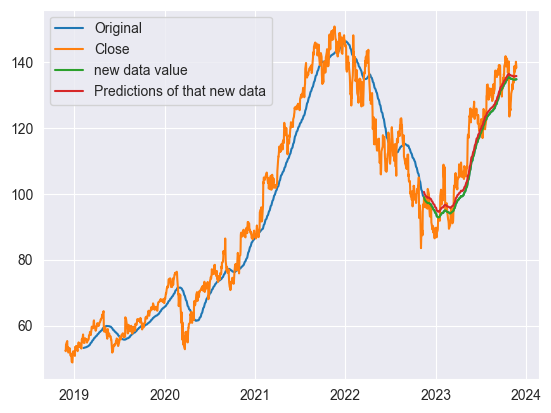

In [49]:
plt.plot(df['fiftyDMA'],label='Original')
plt.plot(df['Close'],label='Close')
plt.plot(y,label='new data value')
plt.plot(predictions,label = 'Predictions of that new data')
plt.legend()